# Import Libraries

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import File titanic

In [135]:
#import file + passengerID columns to index
raw_df = pd.read_csv('8776_0.csv', index_col='PassengerId')
raw_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


## Check for nulls

In [136]:
#count of valid data
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [137]:
#count of nulls
raw_df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

## 4 - Delet column Cabin

In [138]:
# Delete cabin column from df
df = raw_df.drop('Cabin', axis=1)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S


## 5 - Women median age - null replacement

In [139]:
#median age in women
w_age_median = df.loc[df['Sex'] == 'female', 'Age'].median()
w_age_median

27.0

In [140]:
#filter female in sex column and locate null values in column age. Replace those null values 
#with "w_age_median"
df.loc[(df['Sex'] == 'female') & (df['Age'].isna()), 'Age'] = w_age_median
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.0,1,2,W./C. 6607,23.4500,S


## 6 - Men median age - null replacement

In [141]:
#median age in men
m_age_median = df.loc[df['Sex'] == 'male', 'Age'].median()
m_age_median

29.0

In [142]:
#filter female in sex column and locate null values in column age. Replace those null values 
#with "w_age_median"
df.loc[(df['Sex'] == 'male') & (df['Age'].isna()), 'Age'] = m_age_median
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.0,1,2,W./C. 6607,23.4500,S


In [143]:
#check if there are null values
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

## 7 - Replace null values in embarked column

In [144]:
#verify the nulls in embarked column
df.loc[df['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [145]:
#group the different places in embarked
emb_local = df.groupby('Embarked')
emb_local.size()

Embarked
C    168
Q     77
S    644
dtype: int64

In [146]:
#fill the null values in embarked with the higher value counts - S
df['Embarked'] = df['Embarked'].fillna('S')

In [147]:
#Check for nulls
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

## New column with Survived values in string

In [148]:
df['Survived_nobool']=df['Survived'].map({0:'Non-surviver',1:'Surviver'})

## 8 - Distribution of passengers by gender

In [149]:
#Create a chart to show the distribution of passengers by gender.
df.groupby('Sex')['Age'].count()

Sex
female    314
male      577
Name: Age, dtype: int64

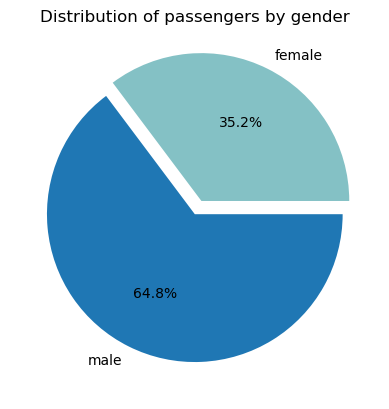

In [150]:
#Change of title and colors, add: percentage,shadow,explode, remove ylabel)
df.groupby('Sex')['Sex'].count().plot.pie(autopct='%1.1f%%',
                                          colors=('#84c1c5','tab:blue'),
                                          explode=(0.1,0),
                                          title='Distribution of passengers by gender',
                                          ylabel='')
plt.savefig('sex_pctg.png',dpi=300)
plt.show()

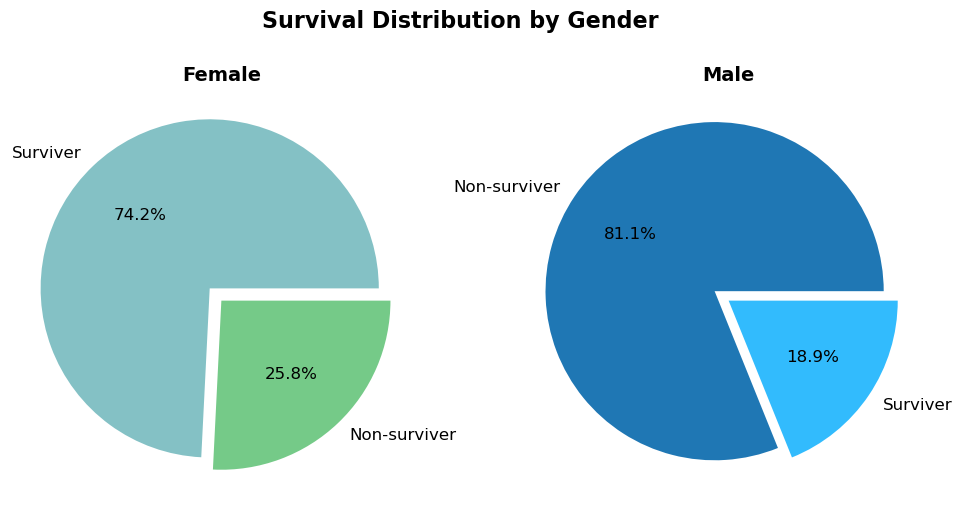

In [151]:
# Agrupar e contar homens e mulheres
counts_female = df.loc[df['Sex'] == 'female', 'Survived_nobool'].value_counts()
counts_male   = df.loc[df['Sex'] == 'male', 'Survived_nobool'].value_counts()

# Criar subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Gráfico das mulheres
counts_female.plot.pie(
    autopct='%1.1f%%',
    colors=['#84c1c5','#75ca88'],
    explode=(0.1,0),
    ax=axes[0],
    textprops={'color':'black'},
    fontsize=12
)
axes[0].set_title("Female", fontsize=14, fontweight="bold")
axes[0].set_ylabel("")

# Gráfico dos homens
counts_male.plot.pie(
    autopct='%1.1f%%',
    colors=['tab:blue','#32bbfd'],
    explode=(0.1,0),
    ax=axes[1],
    textprops={'color':'black'},
    fontsize=12
)
axes[1].set_title("Male", fontsize=14,fontweight="bold")
axes[1].set_ylabel("")

plt.suptitle("Survival Distribution by Gender", fontsize=16, fontweight="bold")
plt.savefig('pctg_gender_survived.png',dpi=300)
plt.show()

## 9 - Passengers distribution vs survival

In [152]:
#Create a chart to show the distribution of passengers by gender and whether they survived
#pivot table with the distribution 
survivers_sex = df.pivot_table(index='Survived_nobool',
                           columns='Sex',
                           values='Name',
                           aggfunc='count')
survivers_sex

Sex,female,male
Survived_nobool,,
Non-surviver,81,468
Surviver,233,109


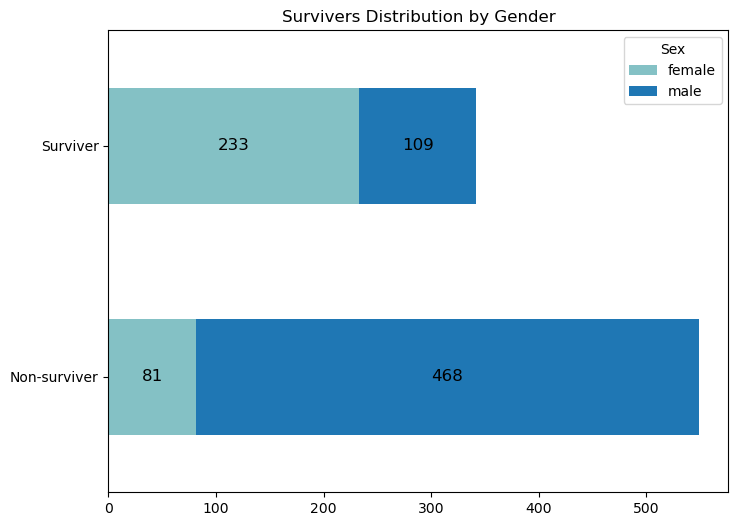

In [153]:
#stacked bar-chart with the distribution of survivers by gender '#bbcd49','#84c1c5'
plot_1 = survivers_sex.plot.barh(
    color=('#84c1c5','tab:blue'),
    title='Survivers Distribution by Gender',
    ylabel='',
    stacked=True,
    figsize=(8,6)
)

# Adiciona os valores nas barras
for container in plot_1.containers:
    plot_1.bar_label(container, fmt='%.0f', label_type='center',fontsize=12)
    
plt.savefig('surviver_sex.png',dpi=300)
plt.show()

## 10 - Distribution of passengers by age

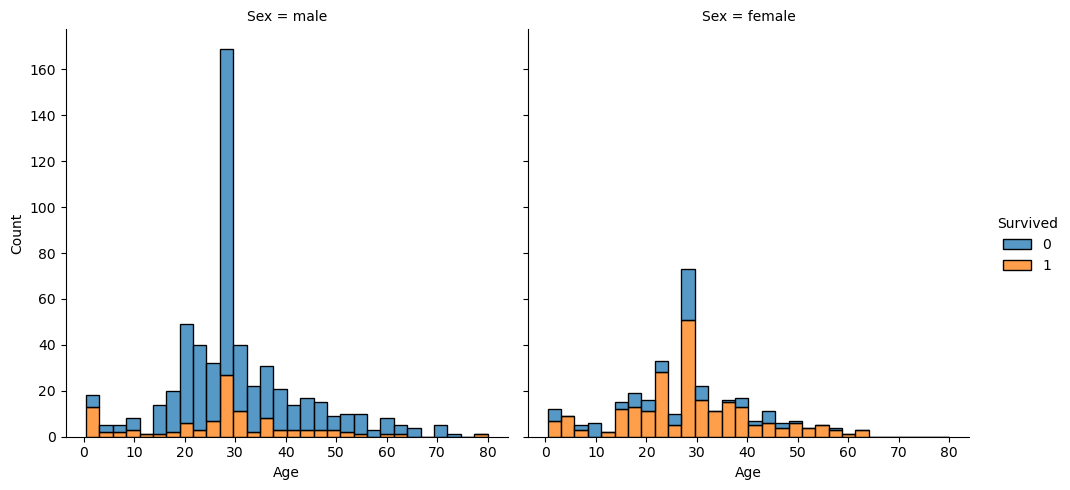

In [154]:
#displot chart to view the age distribution of passengers by age
sns.displot(df, x='Age',
            hue='Survived',
            multiple='stack',
            col='Sex')

plt.show()

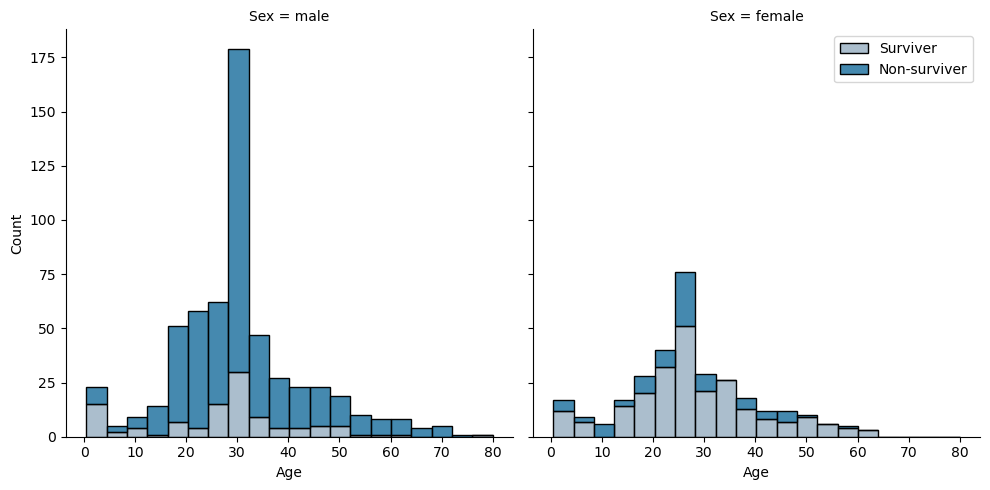

In [155]:
#displot chart to view the age distribution of passengers by age
sns.displot(
    data=df,
    x='Age',
    hue='Survived_nobool',
    col='Sex',
    multiple='stack',
    bins=20,
    kde=False,
    palette=['#076294','#8fa9bd'],
    legend=False)

plt.legend(title='', loc='upper right',labels=["Surviver", "Non-surviver"])
plt.savefig('distribution.png',dpi=300)
plt.show()

## New column with Sex values in boolean

In [156]:
#Add a column with the boolean of male (1) and female (0)
df['Sex_bool']=df['Sex'].map({'male':1,'female':0})
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived_nobool,Sex_bool
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Non-surviver,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Surviver,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Surviver,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Surviver,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Non-surviver,1
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Non-surviver,1
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Surviver,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27.0,1,2,W./C. 6607,23.4500,S,Non-surviver,0


In [157]:
#Definition of age groups
def age_group (age):
    if age <= 12:
        return 'Child'
    elif 12 < age <= 18:
        return 'Teenager'
    elif 18 < age <= 30:
        return 'Young Adult'
    elif 30 < age <= 50:
        return 'Adult'
    else:
        return 'Senior'

#Atribute age groups to each passenger in a new column
df['AgeGroup'] = df['Age'].apply(age_group) 

## 11 - Correlations - Heatmap

In [158]:
#Select the columns for correlation - only columns with numbers
corr_mtx = df[['Survived','Pclass','Age','SibSp','Parch','Fare','Sex_bool']].corr()
corr_mtx

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_bool
Survived,1.000000,-0.338481,-0.073296,-0.035322,0.081629,0.257307,-0.543351
Pclass,-0.338481,1.000000,-0.338056,0.083081,0.018443,-0.549500,0.131900
Age,-0.073296,-0.338056,1.000000,-0.236376,-0.176038,0.094161,0.095256
SibSp,-0.035322,0.083081,-0.236376,1.000000,0.414838,0.159651,-0.114631
Parch,0.081629,0.018443,-0.176038,0.414838,1.000000,0.216225,-0.245489
Fare,0.257307,-0.549500,0.094161,0.159651,0.216225,1.000000,-0.182333
Sex_bool,-0.543351,0.131900,0.095256,-0.114631,-0.245489,-0.182333,1.000000


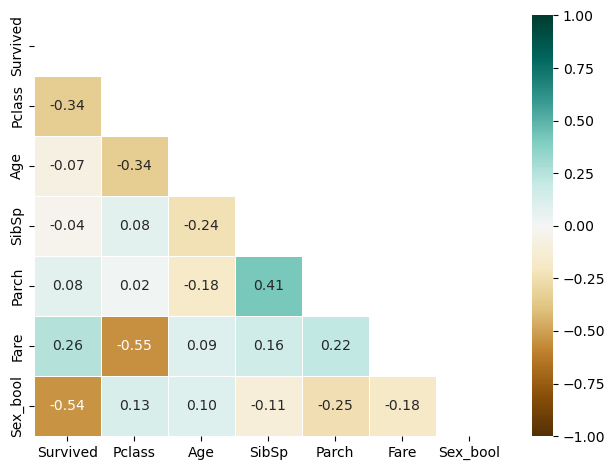

In [159]:
#heatmap, add a mask to only show the values of the bottom triangle of information
mask = np.triu(np.ones_like(corr_mtx)) 
sns.heatmap(corr_mtx,
            annot=True,
            cmap='BrBG', 
            fmt='.2f',
            linewidths=0.5, 
            linecolor='white',
            mask=mask,
            vmax=1,
            vmin=-1)

plt.tight_layout()
plt.savefig('heatmap_1.png', dpi=300)
plt.show()

# Part 2

## Question 1 - How does survival rate vary across passengers class

In [160]:
passg_class = df.groupby('Pclass')
passg_class['Embarked'].count()

Pclass
1    216
2    184
3    491
Name: Embarked, dtype: int64

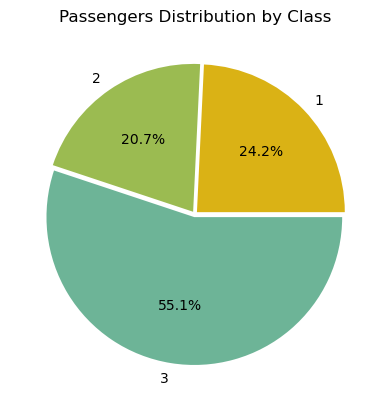

In [161]:
#Distribution of passengers by class - %
passg_class['Embarked'].count().plot.pie(autopct='%1.1f%%',
                                       textprops={'fontsize': 10},
                                      colors=['#dab215','#9bbb51','#6db497'],
                                      explode=[0.02, 0.02,0.02],
                                      ylabel='')
plt.title('Passengers Distribution by Class')
plt.savefig('dist_classe.png',dpi=300)
plt.show()

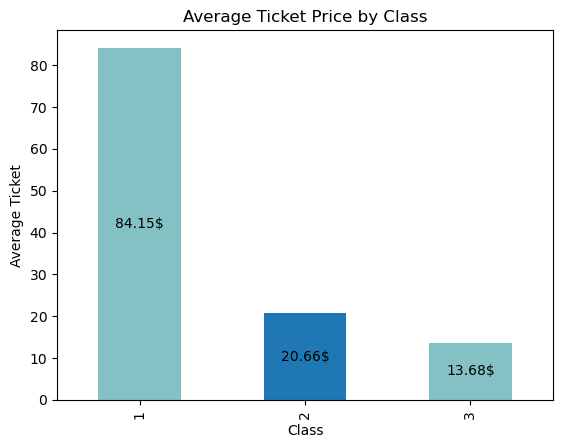

In [162]:
#Average ticket price by class
plot_2 = passg_class['Fare'].mean().round(2).plot.bar(color=('#84c1c5','tab:blue'),
                                            title='Average Ticket Price by Class',
                                            ylabel='Average Ticket',
                                            xlabel='Class'
                                            )
for container in plot_2.containers:
    plot_2.bar_label(container, fmt='%.2f$', label_type='center')

plt.savefig('ticketprice_avg.png',dpi=300)
plt.show()

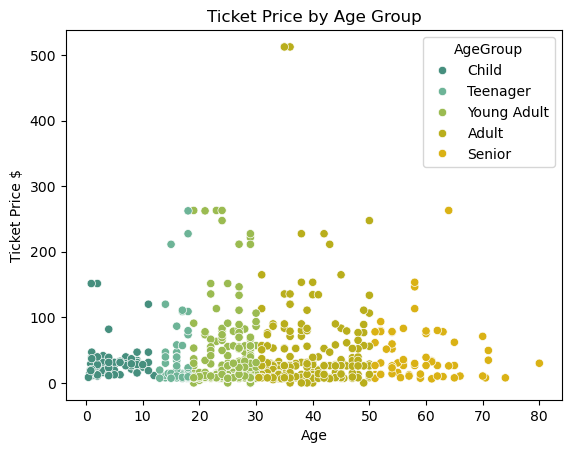

In [163]:
#Dispersion of ticket values by age group
sns.scatterplot(
    data=df,
    x='Age',
    y='Fare',
    hue='AgeGroup',   # cores diferentes para 0 e 1
    palette=['#468f7e','#6db497','#9bbb51','#b9ae1c','#dab215'],  # azul escuro e azul claro
    legend=True,
    hue_order=['Child','Teenager','Young Adult','Adult','Senior']
)

plt.title('Ticket Price by Age Group')
plt.xlabel('Age')
plt.ylabel('Ticket Price $')
plt.savefig('ticketprice_age.png',dpi=300)
plt.show()

In [164]:
class_survivers = (
    df.groupby(['Pclass','Survived'])
      .size()
      .groupby(level=0)   # agrupa só por FamilyCatSize
      .transform(lambda x: x / x.sum() * 100)
      .reset_index(name='class_survivers')
)

In [165]:
df_class_survivers=class_survivers.pivot(index='Pclass', columns ='Survived',values='class_survivers')

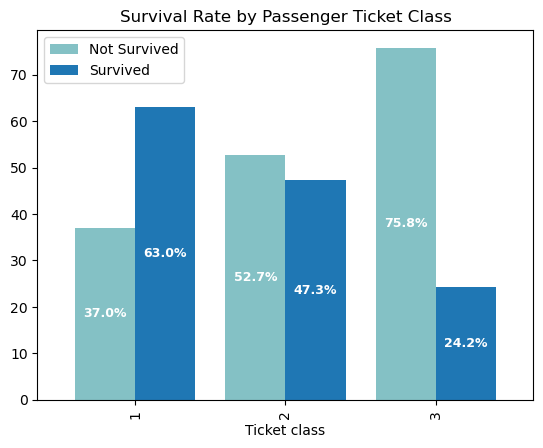

In [166]:
ax =df_class_survivers.plot(kind='bar', stacked=False, width=0.8,color=['#84c1c5','tab:blue'])
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', color='white', fontsize=9, fontweight='bold')
    
plt.title('Survival Rate by Passenger Ticket Class')
plt.ylabel('')
plt.xlabel('Ticket class')
plt.legend(['Not Survived','Survived'])
plt.savefig('Passenger by class__.png')
plt.show()

## Pergunta 1 - Relação entre género e classe

In [167]:
# Número de sobreviventes por género e classe
survival_class = df.groupby(['Survived','Sex','Pclass'])['Survived'].count()
survival_class

Survived  Sex     Pclass
0         female  1           3
                  2           6
                  3          72
          male    1          77
                  2          91
                  3         300
1         female  1          91
                  2          70
                  3          72
          male    1          45
                  2          17
                  3          47
Name: Survived, dtype: int64

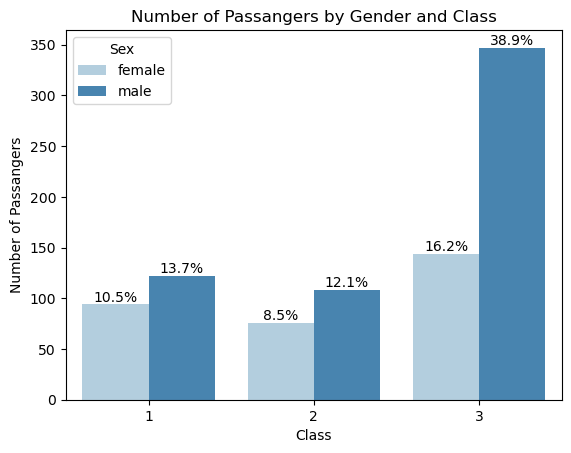

In [168]:
#gráfico com o total de passageiros por classe
ax = sns.countplot(x='Pclass',hue='Sex',data=df,palette='Blues')
total = len(df)

for p in ax.patches:
    height = p.get_height()
    percent = 100 * height / total
    if percent > 0:
        ax.annotate(f'{percent:.1f}%', 
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom')
    
plt.title('Number of Passangers by Gender and Class')
plt.xlabel('Class')
plt.ylabel('Number of Passangers')

plt.show()

## Question 2 -Family size and survival rate

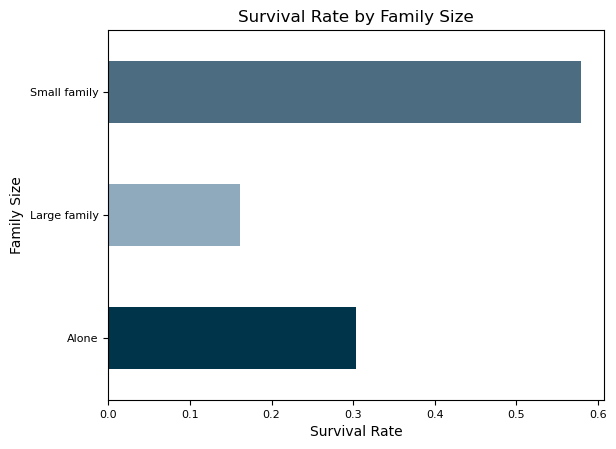

In [169]:
#Add a column with the total fomily on board + passenger himself
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

#Assign group families 
def group (passNu):
    if passNu == 1:
        return 'Alone'
    elif 1 < passNu <= 4:
        return 'Small family'
    else:
        return 'Large family'
    
#Insert groups in a column
df['FamilyCatSize'] = df['FamilySize'].apply(group) 

#Chart with distribution of families groups
df.groupby('FamilyCatSize')['Survived'].mean().plot.barh(color=['#00344a','#8fa9bd','#4c6c81'],fontsize=8)

plt.title('Survival Rate by Family Size')
plt.xlabel('Survival Rate')
plt.ylabel('Family Size')
plt.savefig('survivalrate_group.png',dpi=300)

plt.show()

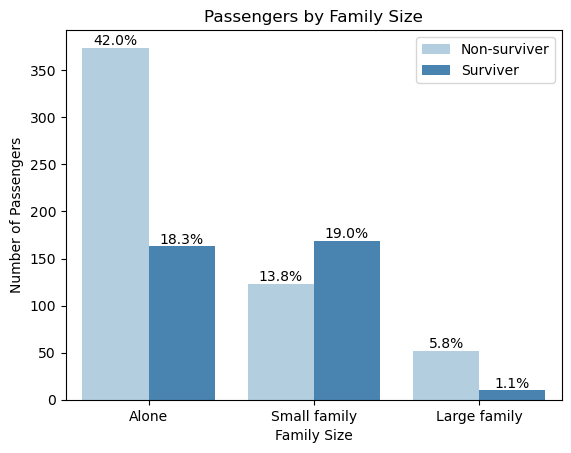

In [170]:
#Chart total passengers by family size
plot_0=sns.countplot(data=df, 
              x='FamilyCatSize', 
              hue='Survived_nobool',
              order=['Alone','Small family','Large family'],
              palette='Blues')

total = len(df)
for p in plot_0.patches:
    height = p.get_height()
    percent = 100 * height / total
    if percent > 0:
       plot_0.annotate(f'{percent:.1f}%', 
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom')

plt.title('Passengers by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Number of Passengers')
plt.legend(['Non-surviver','Surviver'])

plt.savefig('passg_familygroup.png',dpi=300)
plt.show()

In [171]:
#Number of passengers by family size
df.groupby('FamilyCatSize')['Embarked'].count()

FamilyCatSize
Alone           537
Large family     62
Small family    292
Name: Embarked, dtype: int64

In [172]:
#Survival rate by family size
survival_by_family = df.groupby('FamilySize')['Survived'].mean().round(2)
survival_by_family

FamilySize
1     0.30
2     0.55
3     0.58
4     0.72
5     0.20
6     0.14
7     0.33
8     0.00
11    0.00
Name: Survived, dtype: float64

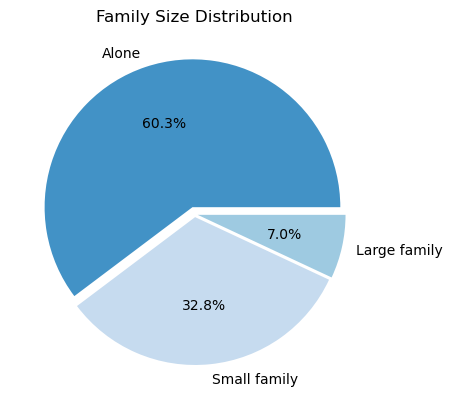

In [173]:
#Chart with family size distribution - %
df['FamilyCatSize'].value_counts().plot.pie(autopct='%1.1f%%',
                                            colors=['#4292c6','#c6dbef', '#9ecae1'],
                                            explode=[0.05,0.02,0.02],
                                            ylabel='')
plt.title('Family Size Distribution')
plt.savefig('dist_familia.png')
plt.show()


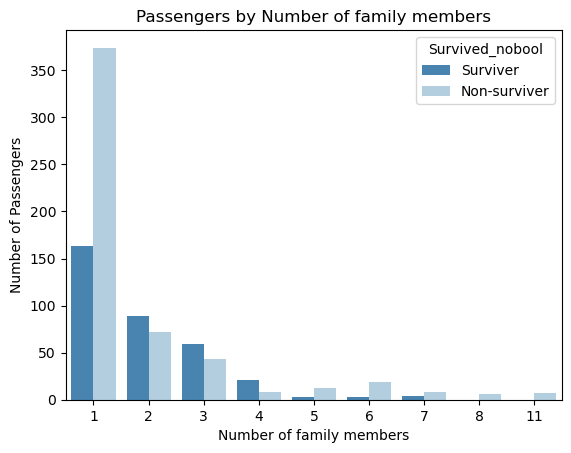

In [185]:
#Chart with the family size distribution - count
sns.countplot(x='FamilySize',
              hue='Survived_nobool',
              data=df,palette='Blues_r'              
             )

plt.title('Passengers by Number of family members')
plt.xlabel('Number of family members')
plt.ylabel('Number of Passengers')

plt.savefig('numberfamilyvssurvival.png',dpi=300)

plt.show()

## Question 3 - Survival rate relation with age group

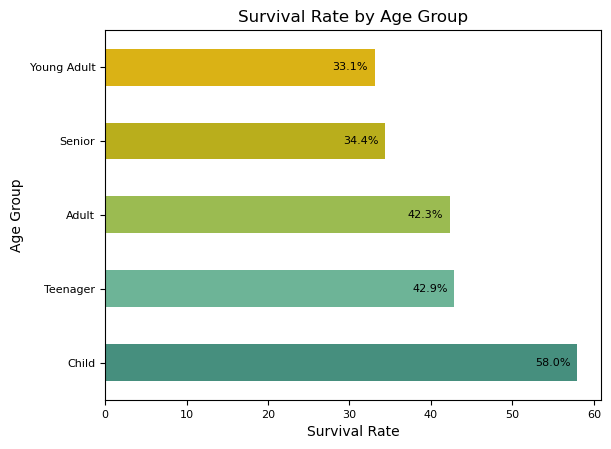

In [175]:
#Chart with the different age groups and survival rate
plot_4=df.groupby('AgeGroup')['Survived'].mean().sort_values(ascending=False)*100
ax=plot_4.plot.barh(color=['#468f7e','#6db497','#9bbb51','#b9ae1c','#dab215'],fontsize=8)

for i, v in enumerate(plot_4):
    ax.text(v -3, i, f"{v:.1f}%", va='center',ha='center', fontsize=8)

plt.title('Survival Rate by Age Group')
plt.xlabel('Survival Rate')
plt.ylabel('Age Group')
plt.savefig('survivalrate_age.png',dpi=300)

plt.show()


In [176]:
#Count number of people in each column(Sex + AgeGroup + Survived)
counts = (
    df.groupby(["Sex", "AgeGroup", "Survived"]).size().reset_index(name="Count")
)

#Percentage calculation
counts["Percent"] = counts.groupby(["Sex"])["Count"] \
                            .transform(lambda x: 100 * x / x.sum())

#Reorganized table
table = counts.pivot_table(
    index=["Sex", "AgeGroup"],
    columns="Survived",
    values="Percent",
    fill_value=0
)

# Rename columns
table.columns = ["% Non-surviver", "% Surviver"]
table

% Non-surviver  % Surviver
Sex    AgeGroup                               
female Adult              6.050955   21.337580
       Child              4.140127    6.050955
       Senior             0.318471    5.095541
       Teenager           2.866242    8.598726
       Young Adult       12.420382   33.121019
male   Adult             20.797227    6.065858
       Child              2.772964    3.639515
       Senior             7.105719    1.039861
       Teenager           5.372617    0.519931
       Young Adult       45.060659    7.625650

In [177]:
#Table with count of age groups
table = counts.pivot_table(
    index=["Sex", "AgeGroup"],
    columns="Survived",
    values="Count")
table

Survived                0      1
Sex    AgeGroup                 
female Adult         19.0   67.0
       Child         13.0   19.0
       Senior         1.0   16.0
       Teenager       9.0   27.0
       Young Adult   39.0  104.0
male   Adult        120.0   35.0
       Child         16.0   21.0
       Senior        41.0    6.0
       Teenager      31.0    3.0
       Young Adult  260.0   44.0

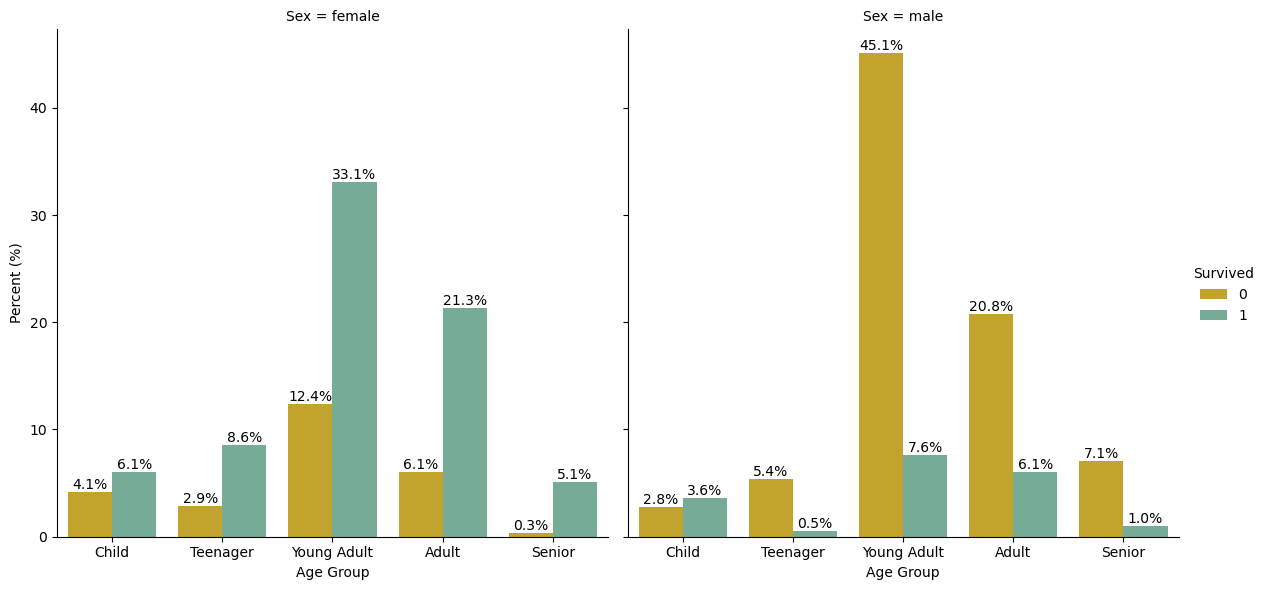

In [178]:
#Chart with age groups distribution by Sex and Survival columns
g = sns.catplot(
    data=counts,
    x="AgeGroup",
    y="Percent",
    hue="Survived",
    col="Sex",
    kind="bar",
    palette=['#dab215','#6db497'],
    order=['Child','Teenager','Young Adult','Adult','Senior'],
    height=6,
    legend=True
)

#Add % values on top of bars
for ax in g.axes.flatten():
    for p in ax.patches:
        value = p.get_height()
        if value > 0:
            ax.text(
                p.get_x() + p.get_width() / 2,   
                value,                          
                f"{value:.1f}%",                 
                ha='center', va='bottom', 
                fontsize=10
                    )

g.set_axis_labels("Age Group", "Percent (%)")
plt.savefig('distribuição_idades_sobrevivenciaPCTG.png',dpi=300)
plt.show()

In [179]:
#Dataframe - describe
df.describe().round(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_bool,FamilySize
count,891.00,891.00,891.00,891.00,891.00,891.00,891.00,891.00
mean,0.38,2.31,29.44,0.52,0.38,32.20,0.65,1.90
std,0.49,0.84,13.02,1.10,0.81,49.69,0.48,1.61
min,0.00,1.00,0.42,0.00,0.00,0.00,0.00,1.00
25%,0.00,2.00,22.00,0.00,0.00,7.91,0.00,1.00
50%,0.00,3.00,29.00,0.00,0.00,14.45,1.00,1.00
75%,1.00,3.00,35.00,1.00,0.00,31.00,1.00,2.00
max,1.00,3.00,80.00,8.00,6.00,512.33,1.00,11.00


In [180]:
#Count of survivers and non-survivers
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [181]:
#Count of passengers by gender
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

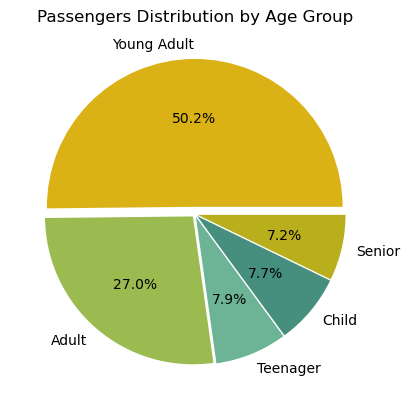

In [182]:
#Chart of distribution by age group
df['AgeGroup'].value_counts().plot.pie(autopct='%1.1f%%',
                                       textprops={'fontsize': 10},
                                      colors=['#dab215','#9bbb51','#6db497','#468f7e','#b9ae1c'],
                                      explode=[0.05, 0.02, 0.02, 0.02, 0.02],
                                      ylabel='')
plt.title('Passengers Distribution by Age Group')
plt.savefig('dist_idades.png',dpi=300)

plt.show()

In [183]:
#Family size distribution
df['FamilyCatSize'].value_counts()

FamilyCatSize
Alone           537
Small family    292
Large family     62
Name: count, dtype: int64

In [184]:
#Passengers count by age group
df['AgeGroup'].value_counts()

AgeGroup
Young Adult    447
Adult          241
Teenager        70
Child           69
Senior          64
Name: count, dtype: int64